In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from classy import Class
import math

In [2]:
n_power = 6
dm_mass = 1 #GeV
l=2500
step = 8e-6
#8e-7 * pow(dm_mass,1.3)
#2e-26 * pow(dm_mass,0.15)
#4e-19 * pow(dm_mass,0.70) <- n=2 
#6e-13 * pow(dm_mass,1.25) <- n=4
#3e-34 * pow(dm_mass,0.5)  <- n=-2

In [3]:
stepsize = [step*0.25*0.25,step*0.25*0.5,step*0.25, step*0.5, step, step*2, step*4, ]
#[step*0.5, step, step*2]
#[1e-18, 2e-18, 4e-18, 8e-18, 16e-18, 32e-18, 64e-18]
#[step*0.5, step, step*2, step*4, step*8, step*16]
print(stepsize)
print(len(stepsize))
print(step)

[5e-07, 1e-06, 2e-06, 4e-06, 8e-06, 1.6e-05, 3.2e-05]
7
8e-06


In [4]:
derivative_cl = []
derivative_norm = []
for x in stepsize:

    params_right = {'output': 'tCl pCl lCl','l_max_scalars': l,'lensing': 'yes',
                    'omega_dmb': 0.12,
                    'h': 0.6730804,
                    'omega_b': 0.0224,
                    'A_s': 2.2e-9,
                    'n_s': 0.96,
                    'tau_reio': 0.07,
                    'omega_cdm' :1e-22,
                    'm_dmb': dm_mass,'n_dmb': n_power,'sigma_dmb': x,
                    'N_ur': 2.0328,'N_ncdm': 1,'m_ncdm': 0.06,'T_ncdm':0.71611,
                    'reionization_optical_depth_tol': 1e-07,
                    'perturb_sampling_stepsize':0.01,
                    'k_max_tau0_over_l_max' : 6,'gauge' : 'synchronous'}
    
    params_center = {'output': 'tCl pCl lCl','l_max_scalars': l,'lensing': 'yes',
                    'omega_dmb': 0.12,
                    'h': 0.6730804,
                    'omega_b': 0.0224,
                    'A_s': 2.2e-9,
                    'n_s': 0.96,
                    'tau_reio': 0.07,
                    'omega_cdm' :1e-22,
                    'm_dmb': dm_mass,'n_dmb': n_power,'sigma_dmb': 0.0,
                    'N_ur': 2.0328,'N_ncdm': 1,'m_ncdm': 0.06,'T_ncdm':0.71611,
                    'reionization_optical_depth_tol': 1e-07,
                     'perturb_sampling_stepsize':0.01,
                     'k_max_tau0_over_l_max' : 6,'gauge' : 'synchronous'}
    
    # Computing Cl_TT for the above parameters in class:
    Mright = Class()
    Mright.set(params_right)
    Mright.compute()
    cl_tot_right = Mright.lensed_cl(l)
    Mright.struct_cleanup()
    Mright.empty()
    cl_TT_right = cl_tot_right['tt']
    ell_right = cl_tot_right['ell']
    
    M = Class()
    M.set(params_center)
    M.compute()
    cl_tot = M.lensed_cl(l)
    M.struct_cleanup()
    M.empty()
    cl_TT = cl_tot['tt']
    ell = cl_tot['ell']
    
    fiducial_norm = ((cl_TT_right - cl_TT) / (x)) /cl_TT
    derivative_norm.append(fiducial_norm)
    
    derivative = [(cl_TT_right[l] - cl_TT[l]) / (x)]
    derivative_cl.append(derivative)

<ipython-input-4-95e408090114>:52: RuntimeWarning: invalid value encountered in true_divide
  fiducial_norm = ((cl_TT_right - cl_TT) / (x)) /cl_TT


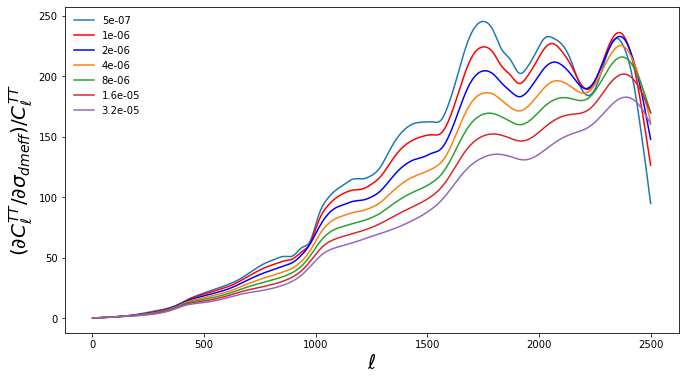

In [5]:
fig, ax = plt.subplots(figsize=(11, 6))
plt.plot(ell, derivative_norm[0],label=stepsize[0])
plt.plot(ell, derivative_norm[1],'r-',label=stepsize[1])
plt.plot(ell, derivative_norm[2],'b-',label=stepsize[2])
plt.plot(ell, derivative_norm[3],label=stepsize[3])
plt.plot(ell, derivative_norm[4],label=stepsize[4])
plt.plot(ell, derivative_norm[5],label=stepsize[5])
plt.plot(ell, derivative_norm[6],label=stepsize[6])
#plt.plot(ell, derivative_norm[7],label=stepsize[7])
#plt.plot(ell, derivative_norm[8],label=stepsize[8])
#plt.plot(ell, derivative_norm[9],label=stepsize[9])
#plt.plot(ell, derivative_norm[10],label=stepsize[10])
#plt.plot(ell, derivative_norm[11],label=stepsize[11])
#plt.plot(ell, derivative_norm[12],label=stepsize[12])


plt.ylabel(r'$(\partial C_{\ell}^{TT} / \partial \sigma_{dmeff}) / C_{\ell}^{TT}$',size=20)
plt.xlabel(r'$\ell$',size=20)
plt.legend(loc='upper left', frameon=False)
#plt.xlim([2, 5000])
#plt.ylim(-8000,500)

plt.show()
fig.savefig("fisher_data/derivative_vs_stepsize_{}GeV_n={}_ell={}.png".format(str(dm_mass),str(n_power),str(l))) 



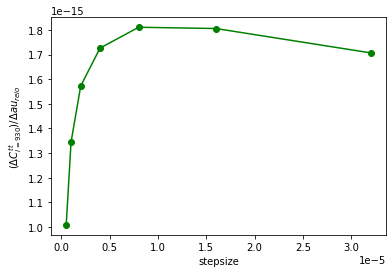

In [6]:
plt.plot(stepsize, derivative_cl,'go-',)
plt.ylabel("$(\Delta C_{l=930}^{tt})/ \Delta \tau_{reio}$")
#plt.xlim([2000, 7e-15])
plt.xlabel("stepsize")
#plt.title("$\Delta C_{l=930}$ vs. stepsize for $\tau_{reio} $")
plt.show()
#fig.savefig("convergence-Omega_cdm.png") 


In [7]:
print(derivative_cl)
print(stepsize)

[[1.0085795280460414e-15], [1.3448608373556002e-15], [1.5725777354479107e-15], [1.7264182193934692e-15], [1.8110604997980636e-15], [1.805801388585149e-15], [1.7070649168691589e-15]]
[5e-07, 1e-06, 2e-06, 4e-06, 8e-06, 1.6e-05, 3.2e-05]


In [8]:
for i in range(len(derivative_cl)-1):
    print(100*np.absolute((derivative_cl[i][0] - derivative_cl[i+1][0])/derivative_cl[i+1][0]))

25.004915004498805
14.480485953684882
8.910962721397032
4.673630749167805
0.2912341991848266
5.783990447011113
